In [1]:
## Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import transforms
import pandas as pd
import seaborn as sns
#from matplotlib.ticker import FixedLocator, FixedFormatter

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine import *
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line
from plotnine import ggplot  # https://plotnine.readthedocs.io/en/stable/
import pandas as pd
import plotnine
%matplotlib inline

from pandas import DataFrame

In [172]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'

In [3]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

#### Get data frames

In [161]:
df = pd.read_csv ( "Data/FIG0512-13.csv")
# Get rid of the trailing null row
df = df [ np.logical_not  ( df.Segment.isna() ) ]
df



,Segment,US Population,Our Customers
0,Segment 7,0.15,0.11
1,Segment 6,0.32,0.20
2,Segment 5,0.10,0.17
3,Segment 4,0.10,0.18
4,Segment 3,0.10,0.15
5,Segment 2,0.07,0.10
6,Segment 1,0.16,0.09


In [162]:
# Unpivot population and customers into one column (value)


df = pd.melt (df.reset_index(), id_vars = 'Segment', 
         value_vars = ['US Population', 'Our Customers'],  
         value_name='value', var_name='Population' )

df.head(5)


# quick hack



,Segment,Population,value
0,Segment 7,US Population,0.15
1,Segment 6,US Population,0.32
2,Segment 5,US Population,0.10
3,Segment 4,US Population,0.10
4,Segment 3,US Population,0.10


In [202]:
df['Segment_lab'] = df.Segment + '                     '

In [180]:
def SWD_style ():

    # Basic information from the 
    
    font = "Arial"
    t=theme_minimal(base_size = 10, base_family = font ) 

    t2 = theme(
      panel_grid_major = element_blank(),
      panel_grid_minor = element_blank(),

      axis_line = element_line(size = .2, color = GRAY9),
      axis_text = element_text(color = GRAY3, size = 12),

      #axis.ticks.x = element_line(size = 0.5, color = GRAY9),
      #axis.ticks.y = element_line(size = 0.5, color = GRAY9),
        
      axis_title = element_text(color = GRAY3),

      #axis_title_y = element_text(hjust = 1, margin = margin(0, 6, 0, 15, "pt")),
      #axis_title_x = element_text(hjust = 0, margin = margin(6, 0, 15, 0, "pt")),
      #plot_subtitle = element_text(color = GRAY4, size= 8),

      plot_title = element_text(color = GRAY4, size= 12 ),
        
      # I don't think this line is implemented in plotnine
      #plot_title_position = "plot", # This aligns the plot title to the very left edge
        
      #plot_caption = element_text(hjust = 0, color = GRAY6),
      #plot_caption_position = "plot",

      #plot_margin = margin(.5,.5,.5,.5,"cm"),
      #plot_margin = (0.4 ),  
        
      strip_text = element_text(color = GRAY7)) 
    
    return t+ t2


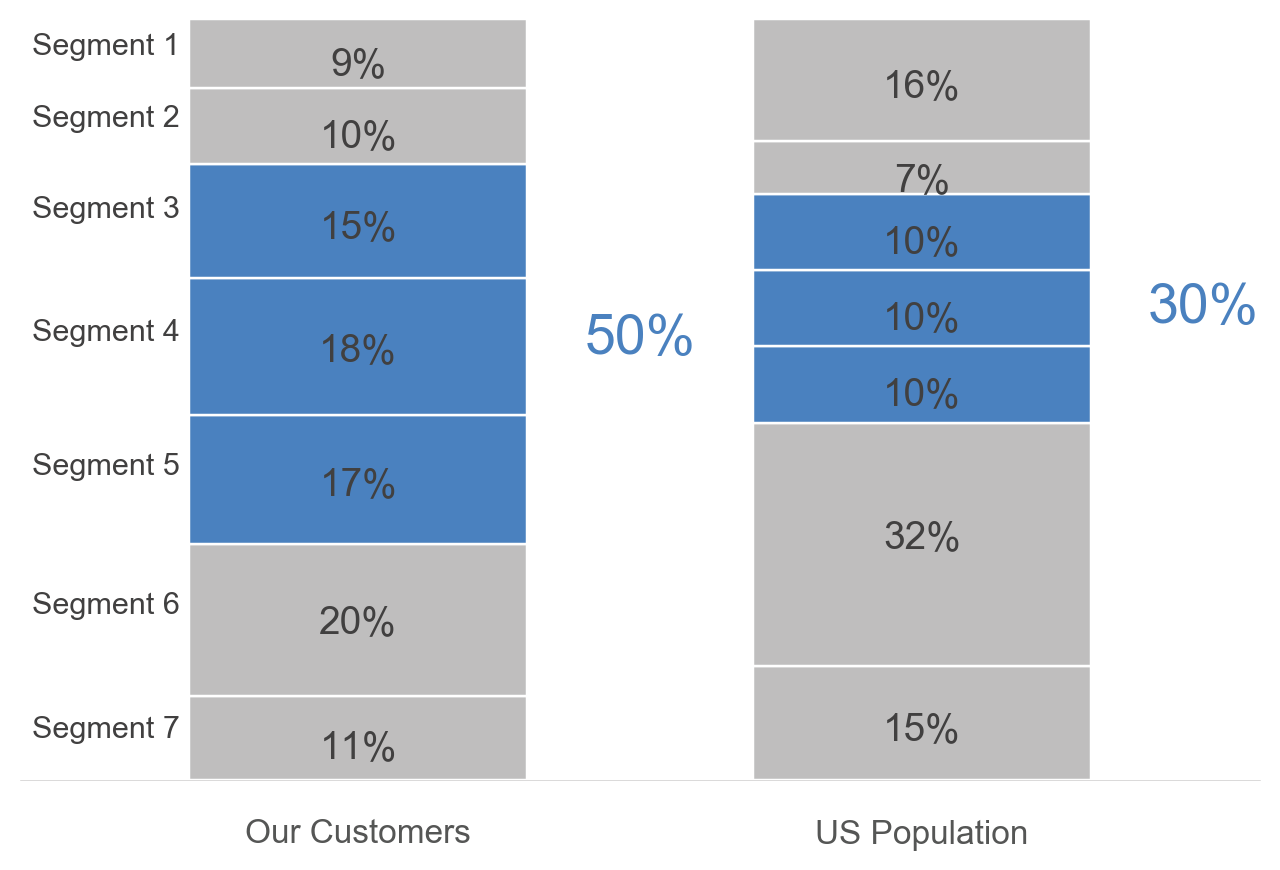

In [203]:
# theme adjustments
t = theme(         
    
          # Overrides
          #axis_line     = element_blank(),
          axis_line_y = element_blank(),

          axis_title_x  = element_blank(),
          #axis_text_x  = element_blank(),

          axis_title_y  = element_blank(),  # nb this will be x 
          axis_text_y   = element_blank(),
    
          # Chuck out grid lines
          panel_grid_major_y=element_blank(), 
          #panel_background=element_blank(),
          #panel_border = element_rect(colour = "black",  fill=None, size=4)    
)
fig = (
ggplot(df, aes(x = 'Population', y ='value', fill = 'Segment'))   +\
       geom_col(position = "stack", color = "white", width = .6)  +\
       scale_fill_manual(guide = False, values = [GRAY9,GRAY9,BLUE2,BLUE2,BLUE2,GRAY9,GRAY9]) +\
       SWD_style() +\
       t +\
       scale_y_continuous(expand = [0,0]) +\
       geom_text( mapping=aes( x='Population',  label=('value*100') ), 
                  color = GRAY2, size = 14, va="top", 
                  position =  position_stack (vjust = 0.6)  ,format_string='{:.0f}%' )  +\
       geom_text(  data = df[df.Population == "Our Customers"], 
          position = position_stack(vjust = .6), mapping=aes(label =  'Segment_lab' )  , ha='right', color=GRAY2 ) +\
       geom_label( x=1.50, y = 0.38+0.2, label='50%', color=BLUE2, fill="white",  boxcolor='none', size=20) +\
       geom_label( x=2.50, y = 0.42+0.2, label='30%', color=BLUE2, fill="white",  boxcolor='none', size=20)

).draw(show=False, return_ggplot=False) 


fig.dpi = 200
width_in = 8
fig.set_size_inches(width_in , width_in/1.62) 
fig.savefig ( 'Plots/3_stacked_comparison')


